In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# Прочитаем файл и выведем основную информацию по нему

In [2]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
display(df.describe())
df.info()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Проверка на наличие пропусков, дубликатов 


In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Пропусков нет

In [5]:
df.duplicated().any()


True

### Дубликаты есть -> удаляем

In [6]:
df=df.drop_duplicates()
df.duplicated().any() 

False

## Проверка на сбалансированность
Данные можно назвать сбалансированными, если количество выборок примерно совпадает.

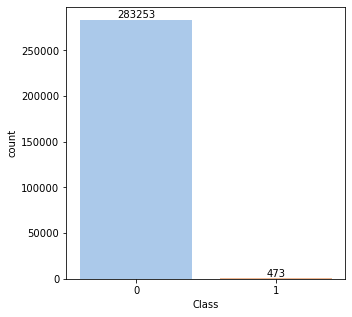

In [7]:
plt.figure(figsize=(5,5))
ax = sns.countplot(x = df['Class'], data = df, palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

Имеется два варианты: обыкновенная транзацкия (принимает значение 0) и мошенническая транзакция (принимает значение 1). Видно, что преобладают данные класса 0 - обычные транзакции. Следовательно, данные несбалансированные.

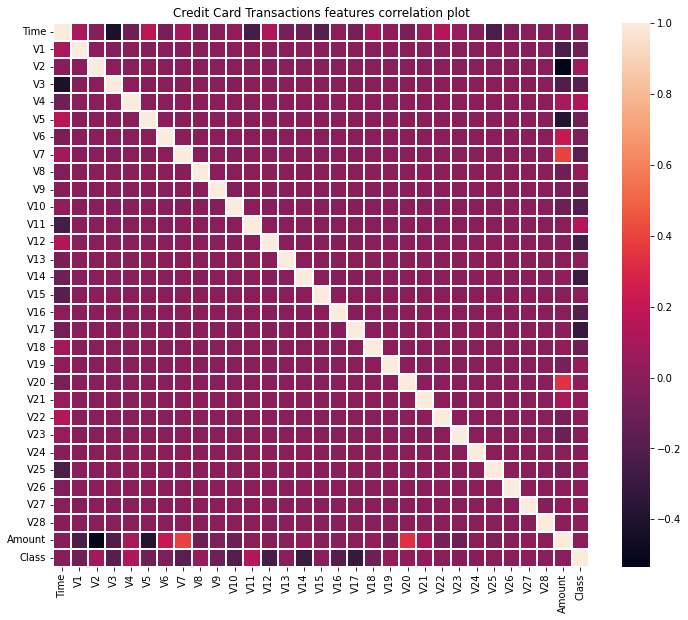

In [8]:
plt.figure(figsize = (12,10))
plt.title('Credit Card Transactions features correlation plot')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.4 , fmt='.1g')
plt.show()

На тепловой карте видно, что показатели V1-V28 никак особо не коррелируют. Исключением являются столбцы Amount и Class



# Разделим исходные данные на test/train группы

In [9]:
X_train, X_test, y_train, y_test = train_test_split (df.drop('Class', axis=1), df['Class'] , test_size=0.2, random_state=42)

# Работа с несбалансированными данными

## 1 Сравним статистики подвыборок

In [10]:
X_train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,...,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000,226980.000000
mean,94784.824844,0.004318,-0.002854,0.001375,-0.002222,0.002471,-0.001759,0.001506,0.000444,-0.001922,...,0.000378,-0.000333,-0.001297,0.000156,0.000080,0.000601,0.000566,0.001978,0.000719,88.504929
std,47495.137144,1.948313,1.649149,1.512782,1.415649,1.388556,1.335118,1.240837,1.179931,1.095950,...,0.768462,0.722405,0.724749,0.628932,0.604963,0.521937,0.483391,0.396996,0.327816,252.411543
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000
25%,54168.000000,-0.917838,-0.599484,-0.889918,-0.849764,-0.688236,-0.769480,-0.551961,-0.208703,-0.644291,...,-0.211497,-0.228571,-0.543165,-0.161774,-0.353833,-0.317411,-0.327384,-0.070644,-0.052843,5.600000
50%,84659.500000,0.020075,0.064758,0.181658,-0.022311,-0.052946,-0.276387,0.039933,0.022225,-0.052643,...,-0.062343,-0.029433,0.005883,-0.011224,0.040876,0.018097,-0.051652,0.001416,0.011282,22.000000
75%,139280.250000,1.315499,0.800914,1.025809,0.741202,0.615075,0.395555,0.570292,0.326579,0.595683,...,0.133300,0.185553,0.526754,0.147413,0.438874,0.351714,0.241420,0.091126,0.078354,77.340000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,19.587773,15.594995,...,39.420904,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000


In [11]:
X_test.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,...,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000,56746.000000
mean,94916.086773,0.012313,-0.009258,0.002564,-0.005944,-0.000746,0.001340,0.002981,-0.006047,-0.000293,...,-0.000577,-0.000520,0.005114,0.000367,0.000750,-0.003564,-0.001515,0.000903,-0.000139,88.343723
std,47424.922811,1.946881,1.636887,1.492180,1.408316,1.329826,1.319112,1.173503,1.175538,1.093670,...,0.776050,0.729903,0.723738,0.602336,0.608279,0.518334,0.476665,0.390699,0.328870,242.186176
min,4.000000,-40.470142,-42.172688,-31.103685,-5.600607,-25.791132,-20.367836,-21.922811,-50.420090,-6.912076,...,-21.387122,-22.889347,-8.887017,-22.575000,-2.822684,-4.781606,-1.773575,-8.839766,-8.464609,0.000000
25%,54320.250000,-0.908962,-0.603852,-0.887955,-0.851132,-0.696158,-0.767616,-0.554126,-0.209278,-0.643979,...,-0.211339,-0.227043,-0.540690,-0.161326,-0.356714,-0.317702,-0.324430,-0.070592,-0.052743,5.630000
50%,84856.000000,0.021525,0.059928,0.173975,-0.021964,-0.056065,-0.270871,0.043727,0.020641,-0.051905,...,-0.062393,-0.029527,0.009561,-0.010851,0.041461,0.009981,-0.054103,0.001778,0.011314,22.000000
75%,139383.000000,1.318048,0.796954,1.031859,0.733680,0.601452,0.399627,0.571267,0.322375,0.596890,...,0.133028,0.188953,0.534261,0.149069,0.443143,0.346665,0.235793,0.091456,0.077813,78.000000
max,172782.000000,2.430507,16.713389,4.040465,13.143668,29.162172,16.493227,25.235195,20.007208,9.234623,...,26.237391,27.202839,7.248763,18.364472,4.022866,5.473885,3.067907,9.200883,16.129609,12910.930000


In [12]:
y_train.describe()

count    226980.000000
mean          0.001687
std           0.041043
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [13]:
y_test.describe()

count    56746.000000
mean         0.001586
std          0.039794
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Class, dtype: float64

В целом, параметры для генеральной и тестовой выборок похожи.

## 2 Методы классификации 


### 2.1 Применение метода - дерево решений

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

classifier_DTC = DecisionTreeClassifier()
classifier_DTC.fit(X_train, y_train)

y_pred_DTC=classifier_DTC.predict(X_test)


print(confusion_matrix(y_test, y_pred_DTC))
print(classification_report(y_test, y_pred_DTC))



[[56625    31]
 [   25    65]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.68      0.72      0.70        90

    accuracy                           1.00     56746
   macro avg       0.84      0.86      0.85     56746
weighted avg       1.00      1.00      1.00     56746



<AxesSubplot:>

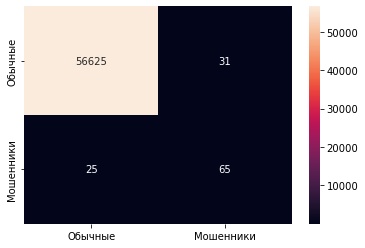

In [15]:
classes_names = ['Обычные','Мошенники']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_DTC), 
                  columns=classes_names, index = classes_names)
                  
sns.heatmap(cm, annot=True, fmt='d')

### 2.2 KNN-метод ближайших соседей

In [16]:
from sklearn.neighbors import KNeighborsClassifier

classifier_KNN= KNeighborsClassifier(n_neighbors=3)
classifier_KNN.fit(X_train, y_train)

y_pred_KNN=classifier_KNN.predict(X_test)

print(confusion_matrix(y_test, y_pred_KNN))
print(classification_report(y_test, y_pred_KNN))

[[56656     0]
 [   84     6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       1.00      0.07      0.12        90

    accuracy                           1.00     56746
   macro avg       1.00      0.53      0.56     56746
weighted avg       1.00      1.00      1.00     56746



<AxesSubplot:>

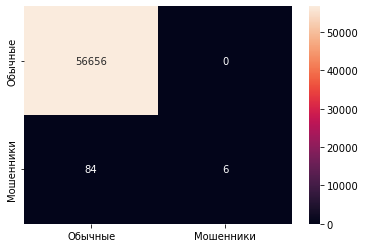

In [17]:
classes_names = ['Обычные','Мошенники']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_KNN), 
                  columns=classes_names, index = classes_names)
                  
sns.heatmap(cm, annot=True, fmt='d')

### 2.3 SVM- метод опорных векторов

In [18]:
from sklearn import svm

C=1
classifier_SVM=svm.SVC(kernel='linear',C=C).fit(X_train,y_train)

y_pred_SVM=classifier_SVM.predict(X_test)

print(confusion_matrix(y_test, y_pred_SVM))
print(classification_report(y_test, y_pred_SVM))

[[56641    15]
 [   70    20]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.57      0.22      0.32        90

    accuracy                           1.00     56746
   macro avg       0.79      0.61      0.66     56746
weighted avg       1.00      1.00      1.00     56746



<AxesSubplot:>

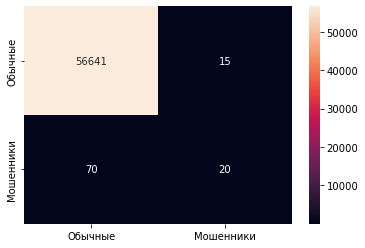

In [19]:
classes_names = ['Обычные','Мошенники']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_SVM), 
                  columns=classes_names, index = classes_names)
                  
sns.heatmap(cm, annot=True, fmt='d')

По итогу исследований на несбалансированных данных можно сказать, что лучший результат был достигнут Методом Деревьев: 66 правильно определенных мошеннических транзакций.

# Работа со сбалансированными данными

## 1. Балансировка

### 1.1 Random Oversampling

In [18]:
from imblearn.over_sampling import RandomOverSampler

ros=RandomOverSampler(random_state=42)
X_over, y_over = ros.fit_resample(X_train, y_train)

zeros_count = (y_over == 0).sum()
ones_count = (y_over == 1).sum()
total_count = len(y_over)

zeros_percentage = (zeros_count / total_count) * 100
ones_percentage = (ones_count / total_count) * 100

print(f"Обычные транзакции: {zeros_percentage:.2f}%")
print(f"Мошеннические транзакции: {ones_percentage:.2f}%\n")
print("Число обычных:", zeros_count)
print("Число мошеннических:", ones_count)



Обычные транзакции: 50.00%
Мошеннические транзакции: 50.00%

Число обычных: 226597
Число мошеннических: 226597


### Сразу применим методы классификации


In [19]:
X=X_over
y=y_over

X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X, y, test_size=0.2, random_state=42)

- ###  Метод деревьев

In [20]:
classifier_DTC_over = DecisionTreeClassifier()
classifier_DTC_over.fit(X_train_over, y_train_over)

y_pred_DTC_over=classifier_DTC_over.predict(X_test_over)


print(confusion_matrix(y_test_over, y_pred_DTC_over))
print(classification_report(y_test_over, y_pred_DTC_over))


[[45208    28]
 [    0 45403]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45236
           1       1.00      1.00      1.00     45403

    accuracy                           1.00     90639
   macro avg       1.00      1.00      1.00     90639
weighted avg       1.00      1.00      1.00     90639



<AxesSubplot:>

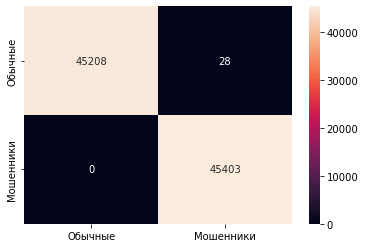

In [21]:
classes_names = ['Обычные','Мошенники']
cm = pd.DataFrame(confusion_matrix(y_test_over, y_pred_DTC_over), 
                  columns=classes_names, index = classes_names)
                  
sns.heatmap(cm, annot=True, fmt='d')

- ### Метод KNN

In [24]:
classifier_KNN_over = KNeighborsClassifier(n_neighbors=3)
classifier_KNN_over.fit(X_train_over, y_train_over)

y_pred_KNN_over=classifier_KNN_over.predict(X_test_over)


print(confusion_matrix(y_test_over, y_pred_KNN_over))
print(classification_report(y_test_over, y_pred_KNN_over))


[[45165    71]
 [    0 45403]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45236
           1       1.00      1.00      1.00     45403

    accuracy                           1.00     90639
   macro avg       1.00      1.00      1.00     90639
weighted avg       1.00      1.00      1.00     90639



<AxesSubplot:>

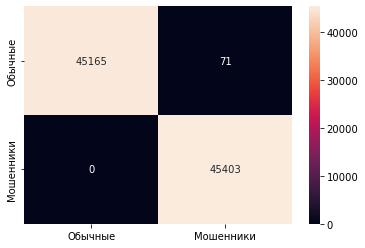

In [25]:
classes_names = ['Обычные','Мошенники']
cm = pd.DataFrame(confusion_matrix(y_test_over, y_pred_KNN_over), 
                  columns=classes_names, index = classes_names)
                  
sns.heatmap(cm, annot=True, fmt='d')

- ### Метод SVM

In [ ]:
# C=1
# classifier_SVM_=svm.SVC(kernel='linear',C=C).fit(X_train_over,y_train_over)

# y_pred_SVM_over=classifier_SVM.predict(X_test_over)

# print(confusion_matrix(y_test_over, y_pred_SVM_over))
# print(classification_report(y_test_over, y_pred_SVM_over))

In [ ]:
# classes_names = ['Обычные','Мошенники']
# cm = pd.DataFrame(confusion_matrix(y_test_over, y_pred_SVM_over), 
#                   columns=classes_names, index = classes_names)
                  
# sns.heatmap(cm, annot=True, fmt='d')

Ну что тут сказать. При over-сэмплинге появляется огромное количество данных для обработки, а этот метод и так не быстрый. В общем за час с лишним он так и не посчитался. Я его на ночь оставлю и, если что добавлю прогруженный вариант на гит.

### 1.2 Random Undersampling

In [22]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy='auto')
X_under, y_under = rus.fit_resample(X_train, y_train)

zeros_count = (y_under == 0).sum()
ones_count = (y_under == 1).sum()
total_count = len(y_under)

zeros_percentage = (zeros_count / total_count) * 100
ones_percentage = (ones_count / total_count) * 100

print(f"Обычные транзакции: {zeros_percentage:.2f}%")
print(f"Мошеннические транзакции: {ones_percentage:.2f}%\n")
print("Число обычных:", zeros_count)
print("Число мошеннических:", ones_count)

Обычные транзакции: 50.00%
Мошеннические транзакции: 50.00%

Число обычных: 383
Число мошеннических: 383


In [23]:
X_u=X_under
y_u=y_under

X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_u, y_u, test_size=0.2, random_state=42)


- ### Метод деревьев

In [24]:
classifier_DTC_under = DecisionTreeClassifier()
classifier_DTC_under.fit(X_train_under, y_train_under)

y_pred_DTC_under=classifier_DTC_under.predict(X_test_under)


print(confusion_matrix(y_test_under, y_pred_DTC_under))
print(classification_report(y_test_under, y_pred_DTC_under))

[[73  5]
 [ 7 69]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        78
           1       0.93      0.91      0.92        76

    accuracy                           0.92       154
   macro avg       0.92      0.92      0.92       154
weighted avg       0.92      0.92      0.92       154



<AxesSubplot:>

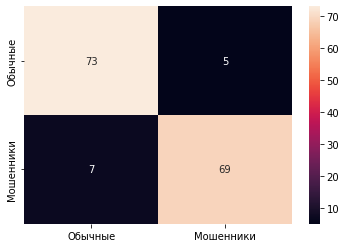

In [25]:
classes_names = ['Обычные','Мошенники']
cm = pd.DataFrame(confusion_matrix(y_test_under, y_pred_DTC_under), 
                  columns=classes_names, index = classes_names)
                  
sns.heatmap(cm, annot=True, fmt='d')

- ### KNN

In [26]:
classifier_KNN_under = KNeighborsClassifier(n_neighbors=3)
classifier_KNN_under.fit(X_train_under, y_train_under)

y_pred_KNN_under=classifier_KNN_under.predict(X_test_under)


print(confusion_matrix(y_test_under, y_pred_KNN_under))
print(classification_report(y_test_under, y_pred_KNN_under))

[[51 27]
 [26 50]]
              precision    recall  f1-score   support

           0       0.66      0.65      0.66        78
           1       0.65      0.66      0.65        76

    accuracy                           0.66       154
   macro avg       0.66      0.66      0.66       154
weighted avg       0.66      0.66      0.66       154



<AxesSubplot:>

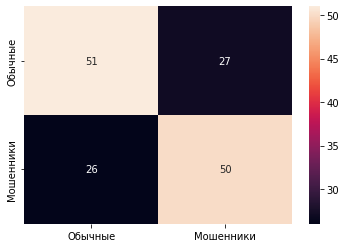

In [27]:
classes_names = ['Обычные','Мошенники']
cm = pd.DataFrame(confusion_matrix(y_test_under, y_pred_KNN_under), 
                  columns=classes_names, index = classes_names)
                  
sns.heatmap(cm, annot=True, fmt='d')

- ### SVM

In [30]:
from sklearn import svm
C=1
classifier_SVM_under=svm.SVC(kernel='linear',C=C).fit(X_train_under,y_train_under)

y_pred_SVM_under=classifier_SVM_under.predict(X_test_under)

print(confusion_matrix(y_test_under, y_pred_SVM_under))
print(classification_report(y_test_under, y_pred_SVM_under))

[[78  0]
 [12 64]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        78
           1       1.00      0.84      0.91        76

    accuracy                           0.92       154
   macro avg       0.93      0.92      0.92       154
weighted avg       0.93      0.92      0.92       154



<AxesSubplot:>

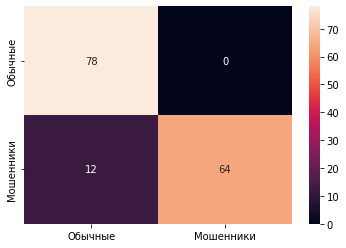

In [32]:
classes_names = ['Обычные','Мошенники']
cm = pd.DataFrame(confusion_matrix(y_test_under, y_pred_SVM_under), 
                  columns=classes_names, index = classes_names)
                  
sns.heatmap(cm, annot=True, fmt='d')

# Подведение итогов:
- Были применены методы классификации: DecisionTreeClassifier, KNN, SVM. 
- Сначала методы были реализованы на несбалансированных данных. Точность в данном случае не высокая, что вполне ожидаемо. Лучше всего себя проявил метод DecisionTreeClassifier.
- Далее была проведена балансировка данных двумя способами: RandomOverSampler и RandomUnderSampler. Методы остались те же, что и в первом случае с несбалансированными данными. Точность повысилась при обоих способах сэмплирования, но более хороший результат показали методы с over-сэмплированием. 
- Отдельно стоит отметить, что DecisionTreeClassifier выдавал более высокую точность во всех случаях, по сравнению с другими методами, при этом работал он быстрее, чем KNN и, особенно, SVM.